In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress 

In [35]:
df = pd.read_csv('http://www3.epa.gov/climatechange/images/indicator_downloads/sea-level_fig-1.csv',skiprows=6)

In [36]:
df

,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [37]:
df.loc[df['CSIRO - Adjusted sea level (inches)'].isna()] 

,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)
134,2014,NaN,NaN,NaN,8.6637


In [38]:
df.dropna(subset='CSIRO - Adjusted sea level (inches)',inplace=True)

In [39]:
df.loc[df['CSIRO - Adjusted sea level (inches)'].isna()] 

,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)


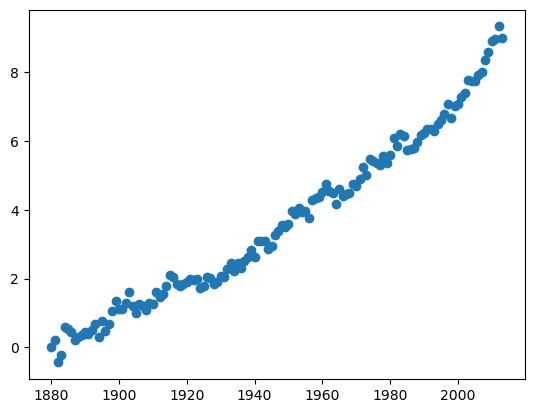

In [40]:
plt.scatter(df['Year'],df['CSIRO - Adjusted sea level (inches)'])
plt.show()

In [43]:
reg = linregress(df['Year'] ,df['CSIRO - Adjusted sea level (inches)'])

In [47]:
reg

Type:           LinregressResult
String form:    LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.0009692118713287149, intercept_stderr=1.8869433812425223)
Length:         5
File:           c:\users\david\anaconda3\envs\myenv\lib\site-packages\scipy\stats\_stats_mstats_common.py
Docstring:      LinregressResult(slope, intercept, rvalue, pvalue, stderr, intercept_stderr)
Init docstring: Instantiate instance of LinregressResult(slope, intercept, rvalue, pvalue, stderr, intercept_stderr)

In [65]:
future_years = np.arange(start=2014,stop=2051,step=1)

In [66]:
future_years

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,
       2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046,
       2047, 2048, 2049, 2050])

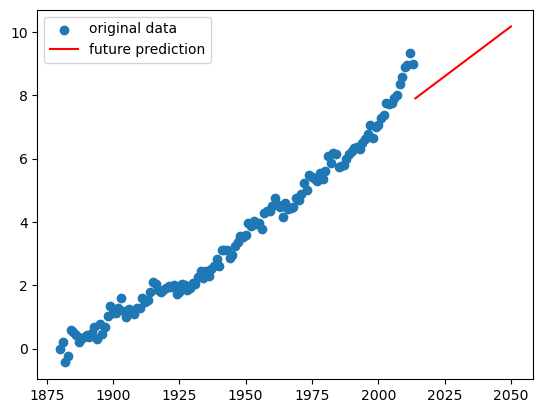

In [67]:
plt.scatter(df['Year'],df['CSIRO - Adjusted sea level (inches)'], label='original data')
plt.plot(future_years, reg.intercept + reg.slope*future_years, 'r', label='future prediction')
plt.legend()
plt.show()

In [68]:
df2k = df.loc[df['Year']>=2000]

In [69]:
df2k

,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [70]:
reg2k = linregress(df2k['Year'],df2k['CSIRO - Adjusted sea level (inches)'])

In [81]:
range2k = np.append(df2k['Year'],future_years)

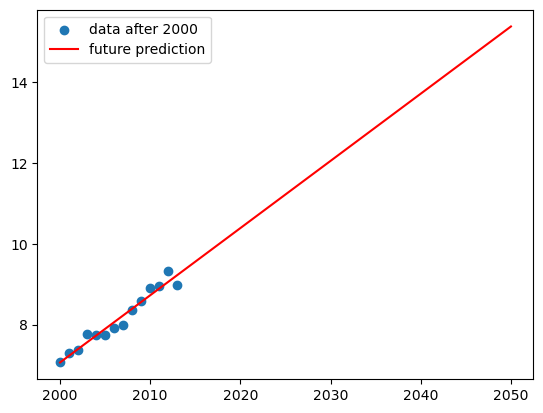

In [82]:
plt.scatter(df2k['Year'],df2k['CSIRO - Adjusted sea level (inches)'], label='data after 2000')
plt.plot(range2k, reg2k.intercept + reg2k.slope*range2k, 'r', label='future prediction')
plt.legend()
plt.show()